<br><br><center><h1 style="font-size:2em;color:#2467C0">130k Wine Reviews</h1></center>

This data analysis is using an open dataset from Kaggle, 130k wine reviews from Kaggle via Wine Enthusiast. The purpose of this excercise is to find the top words or descriptors in the wine description column and any associated trends.


Source:

https://www.kaggle.com/zynicide/wine-reviews

https://www.winemag.com/?s=&drink_type=wine


## Step 1: Initial exploration of the Dataset

In [1]:
# import the data and style use for charts/graphs

import pandas as pd
import numpy as np                                                               

import string
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

reviews = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)
print(reviews.shape)
reviews.head()

(129971, 13)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [2]:
# check for null values
reviews.isnull().any()

country                   True
description              False
designation               True
points                   False
price                     True
province                  True
region_1                  True
region_2                  True
taster_name               True
taster_twitter_handle     True
title                    False
variety                   True
winery                   False
dtype: bool

In [3]:
# counting nulls
reviews.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

- So far so good; we have some missing values but only one is slightly concerning is the 13k missing price values, which i will ignore
- since this will be a visual analysis of top wine description 'words', we need to clean up the description column

In [4]:
reviews['description'].loc[0]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [5]:
# lowercase the description column
reviews['description'] = reviews['description'].apply(lambda x: x.lower())

In [6]:
# remove punctation from the description column
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

reviews["description"] = reviews['description'].apply(remove_punctuations)

In [7]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,aromas include tropical fruit broom brimstone ...,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,this is ripe and fruity a wine that is smooth ...,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,tart and snappy the flavors of lime flesh and ...,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,pineapple rind lemon pith and orange blossom s...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,much like the regular bottling from 2012 this ...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


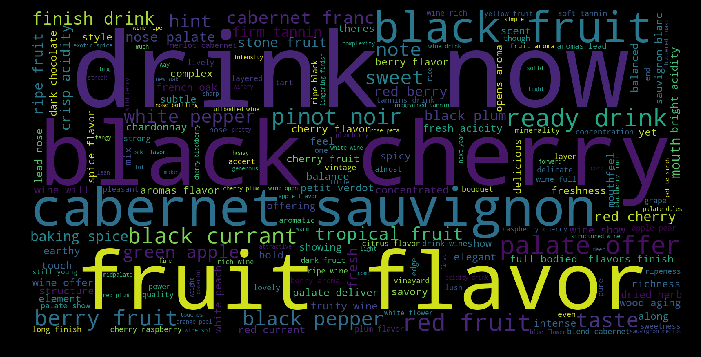

In [8]:
# good to go
# generate a word cloud prior to removing the common or stop words.

from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800).generate(' '.join(reviews['description']))
# Generate plot
plt.figure( figsize=(12,6), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [9]:
from PIL import Image
wine_mask = np.array(Image.open('wine_bottle.png'))

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wine_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

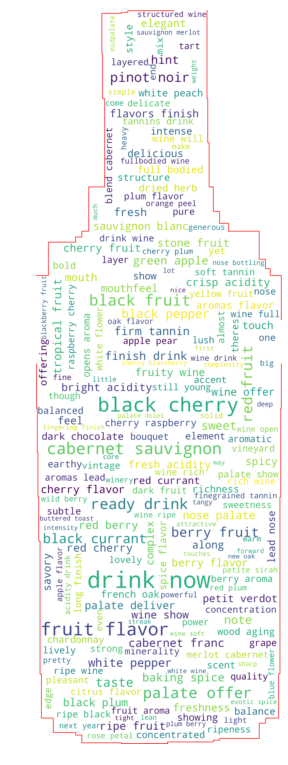

In [10]:
# instantiate a word cloud object
wordcloud = WordCloud(background_color='white', mask=wine_mask, contour_width=5, contour_color='red')

# generate the word cloud
wordcloud.generate(' '.join(reviews['description']))

# display the word cloud
fig = plt.figure()
fig.set_figwidth(10.5) # set width
fig.set_figheight(13.5) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
wine_desc_before_sw = reviews['description'].loc[0]
wine_desc_before_sw

'aromas include tropical fruit broom brimstone and dried herb the palate isnt overly expressive offering unripened apple citrus and dried sage alongside brisk acidity'

In [12]:
print(len(reviews['country'].unique()))

44


In [13]:
reviews['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

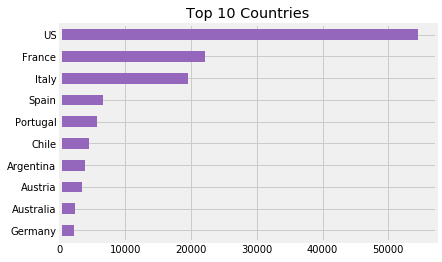

In [14]:
# top 10 countries
reviews['country'].value_counts().head(10).plot.barh(color='tab:purple', title = 'Top 10 Countries').invert_yaxis()

In [15]:
# how many unique provinces
print(len(reviews['province'].unique()))

426


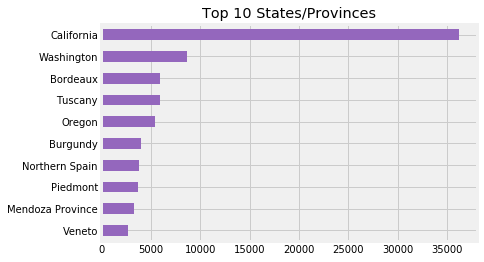

In [16]:
# top ten provinces/states
reviews['province'].value_counts().head(10).plot.barh(color='tab:purple', title = 'Top 10 States/Provinces').invert_yaxis()

In this dataset, the US and California accounts for more wine than any other country and province

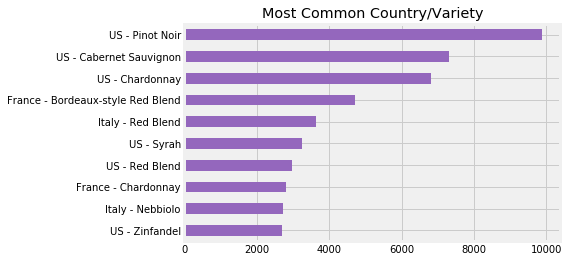

In [17]:
# What combination of countries and varieties are most common?

expected = reviews.loc[(reviews.country.notnull()) & (reviews.variety.notnull())]
expected = expected.apply(lambda srs: srs.country + " - " + srs.variety, axis='columns')
expected = expected.value_counts()
expected.head(10).plot.barh(color='tab:purple', title = 'Most Common Country/Variety').invert_yaxis()

In [18]:
# points max, min, median
print(reviews['points'].max())
print(reviews['points'].min())
print(reviews['points'].median())

100
80
88.0


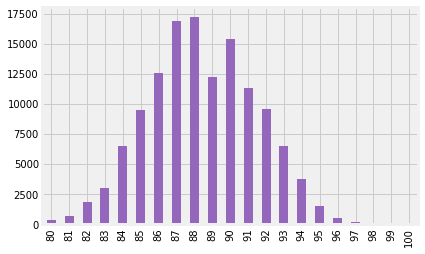

In [19]:
# so the reviews are between 80 and 100 points
# lets see quantity by point value
reviews['points'].value_counts().sort_index().plot.bar(color='tab:purple')

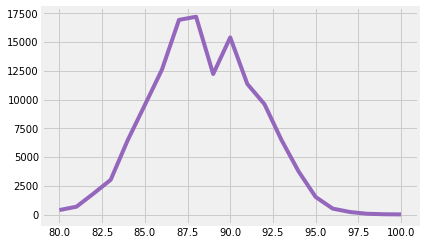

In [20]:
reviews['points'].value_counts().sort_index().plot.line(color='tab:purple')

In [21]:
# what about price points
print(reviews['price'].max())
print(reviews['price'].min())
print(reviews['price'].median())

3300.0
4.0
25.0


What a range on price. 
So the median point value is 88 and the median price is $25

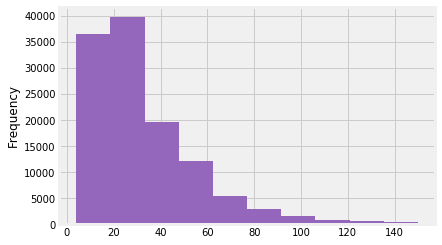

In [22]:
# lets see the price distribution and set the ceiling at $150
reviews[reviews['price'] <= 150]['price'].plot.hist(color='tab:purple')

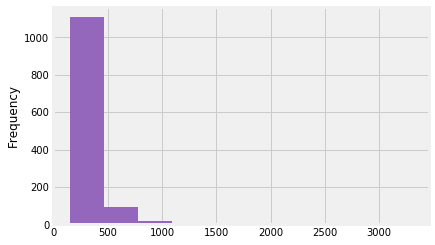

In [23]:
reviews[reviews['price'] > 150]['price'].plot.hist(color='tab:purple')

In [24]:
# ok what wines are > $1,000
reviews[reviews['price'] > 1000]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1558,France,a massive wine for margaux packed with tannins...,NaN,98,1900.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux
1566,France,such a generous and ripe wine with a dark core...,NaN,97,1100.0,Bordeaux,Pessac-Léognan,NaN,Roger Voss,@vossroger,Château La Mission Haut-Brion 2009 Pessac-Léo...,Bordeaux-style Red Blend,Château La Mission Haut-Brion
1571,France,solid very structured packed with dense and dr...,NaN,96,1200.0,Bordeaux,Pessac-Léognan,NaN,Roger Voss,@vossroger,Château Haut-Brion 2009 Pessac-Léognan,Bordeaux-style Red Blend,Château Haut-Brion
1575,France,the purest cabernet sauvignon fruit with dark ...,NaN,96,1300.0,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Mouton Rothschild 2009 Pauillac,Bordeaux-style Red Blend,Château Mouton Rothschild
15840,France,the wine is a velvet glove in an iron fist the...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
65352,France,this extravagantly perfumed wine has great jui...,NaN,97,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus
80290,France,this ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
89478,Austria,wet earth rainwet stones damp moss wild sage a...,Ried Loibenberg Smaragd,94,1100.0,Wachau,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Emmerich Knoll 2013 Ried Loibenberg Smaragd Gr...,Grüner Veltliner,Emmerich Knoll
98380,France,a superb wine from a great year this is powerf...,NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
111753,France,almost black in color this stunning wine is go...,NaN,100,1500.0,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild


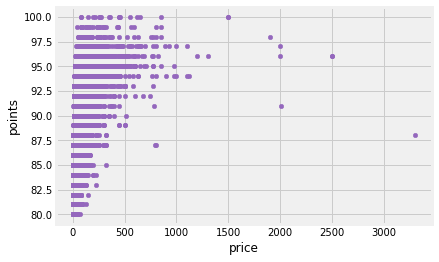

In [25]:
# lets see the scatter plot
reviews.plot.scatter(x='price', y='points', color='tab:purple')

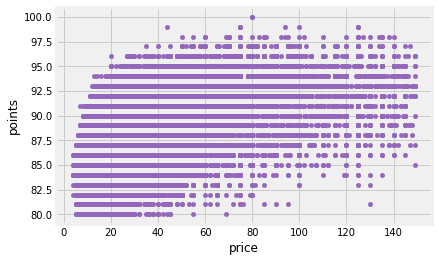

In [26]:
reviews[reviews['price'] < 150].plot.scatter(x='price', y='points', color='tab:purple')

In [27]:
# how many varieties?
print(len(reviews['variety'].value_counts()))

707


yikes 707 variety of wines

In [28]:
reviews['variety'].value_counts().head(15)

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Nebbiolo                     2804
Zinfandel                    2714
Sangiovese                   2707
Malbec                       2652
Portuguese Red               2466
Name: variety, dtype: int64

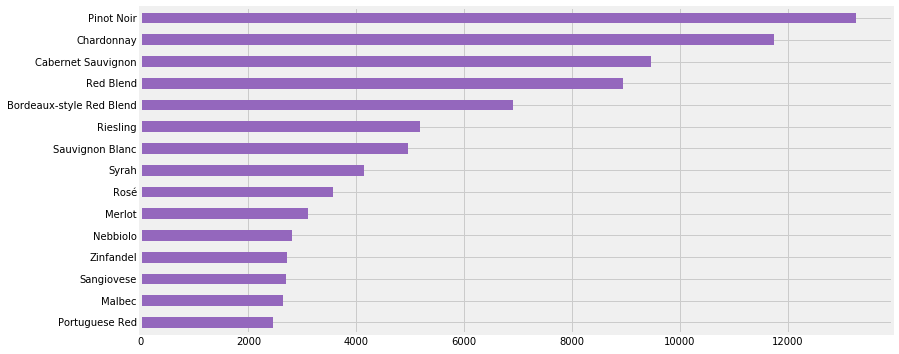

In [29]:
# let's see the top 15
reviews['variety'].value_counts().head(15).plot.barh(figsize=(12, 6),color='tab:purple').invert_yaxis()

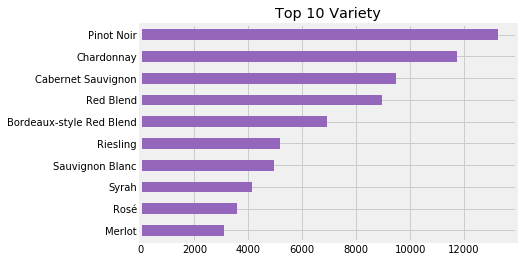

In [30]:
# top 10 Varieties
reviews['variety'].value_counts().head(10).plot.barh(color='tab:purple',title = 'Top 10 Variety').invert_yaxis()

In [31]:
print(len(reviews['winery'].value_counts()))

16757


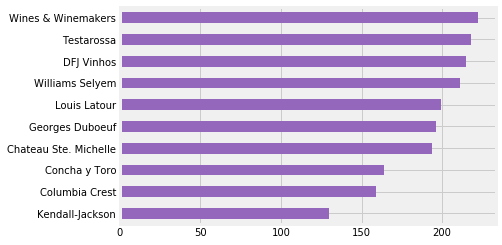

In [32]:
# so 16,757 wineries in the dataset
# top 10 winery in the dataset
reviews['winery'].value_counts().head(10).plot.barh(color='tab:purple').invert_yaxis()

## Step 2 - Top Word Descriptors

In [33]:
# count uniqe words in description
# removing common stop words from a stopwords file + additional 'wine' stopwords from below
# PLUS flavors, wine, finish, chardonnay, pinot, cabernet, sauvignon, blanc
# syrah, riesling, merlot, zinfandel, zin, blend, fruit, noir, red, now, drink

stopwords = open('stopwords_wine.txt').read().lower().split()

In [34]:
# removing stopwords from the description
reviews['description'] = reviews['description'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in stopwords))

In [35]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,aromas include tropical fruit broom brimstone ...,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,ripe fruity smooth still structured firm tanni...,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,tart snappy lime flesh rind dominate green pin...,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,pineapple rind lemon pith orange blossom start...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,much regular bottling 2012 comes across rather...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [36]:
# comparing one description before and after stop words were removed
wine_desc_before_sw
wine_desc_after_sw = reviews['description'].loc[0]
print(wine_desc_before_sw)
print(' ')
print(wine_desc_after_sw)

aromas include tropical fruit broom brimstone and dried herb the palate isnt overly expressive offering unripened apple citrus and dried sage alongside brisk acidity
 
aromas include tropical fruit broom brimstone dried herb palate isnt overly expressive offering unripened apple citrus dried sage alongside brisk acidity


In [37]:
# selecting the entire reviews description column
all_reviews = reviews['description'].tolist()

In [38]:
# function to remove the stop words

import re
from collections import Counter

def word_counter(string_list):
    word_count = {}
    for word in string_list:
        for word in re.split('\s', word): # split with whitespace
            try:
                word_count[word] += 1
            except KeyError:
                word_count[word] = 1
    return word_count

In [39]:
# remove the stop words; convert to a pd Series; sort by count value
all_wine_wc = word_counter(all_reviews)
all_wine_wc = pd.Series(all_wine_wc, name='count')

In [40]:
all_wine_wc.sort_values(ascending=False)[0:50]


fruit         45012
aromas        39613
palate        38083
acidity       34958
tannins       30854
cherry        27380
ripe          26989
black         25388
notes         19018
spice         18778
rich          17274
fresh         16953
nose          16910
oak           16642
berry         15488
dry           15428
plum          14117
soft          13539
fruits        13506
apple         12842
crisp         12793
blackberry    12703
offers        12663
sweet         12392
texture       12381
white         12295
shows         11515
light         11438
citrus        11375
dark          11329
bright        10968
vanilla       10688
well          10606
full          10096
pepper         9905
juicy          9750
fruity         9466
good           9438
raspberry      9297
firm           9160
green          9046
peach          8520
touch          8517
lemon          8499
character      8326
chocolate      8241
will           8109
dried          7870
balanced       7865
pear           7790


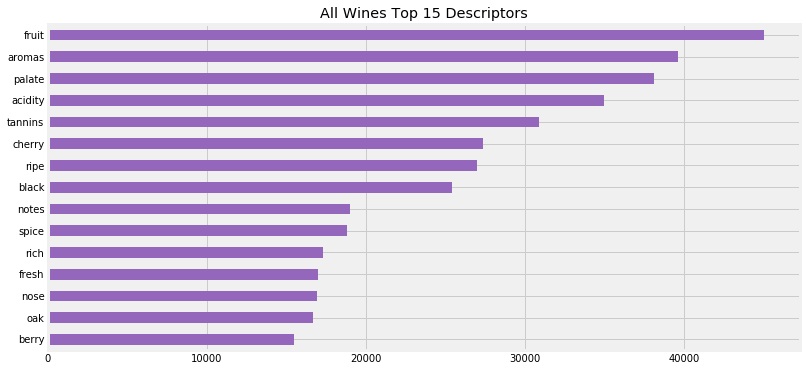

In [41]:
# chart the top 15 word descriptors
all_wine_wc.sort_values(ascending=False)[0:15].plot.barh(figsize=(12, 6), color='tab:purple', title = 'All Wines Top 15 Descriptors').invert_yaxis()

In [42]:
# function to plot the top ten words by wine variety
def wine_variety(df, variety):
    sub_df = df[df['variety']== variety]
    description = sub_df['description'].tolist()
    wc = word_counter(description)
    wc_names = pd.Series(wc, name='count')
    plot = wc_names.sort_values(ascending=False)[0:15].plot.barh(color='tab:purple', title = variety + ' Top Descriptors').invert_yaxis()
    return plot

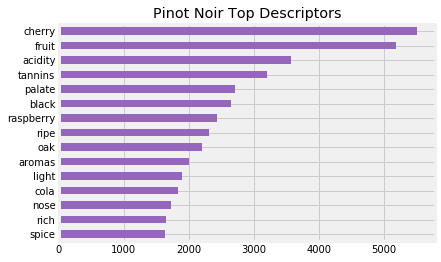

In [43]:
# top 10 variety wine descriptors 
Pinot_Noir = wine_variety(reviews, 'Pinot Noir')
Pinot_Noir

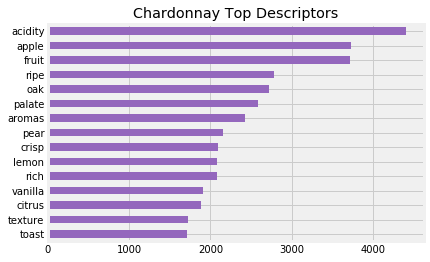

In [44]:
Chardonnay = wine_variety(reviews, 'Chardonnay')
Chardonnay

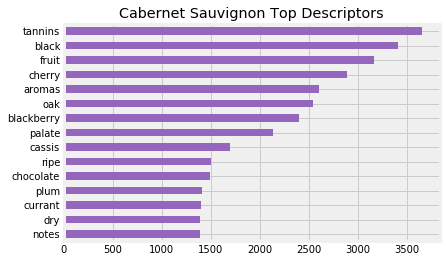

In [45]:
Cabernet_Sauvignon = wine_variety(reviews, 'Cabernet Sauvignon')
Cabernet_Sauvignon

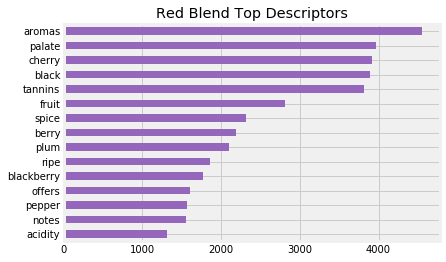

In [46]:
Red_Blend = wine_variety(reviews, 'Red Blend')
Red_Blend

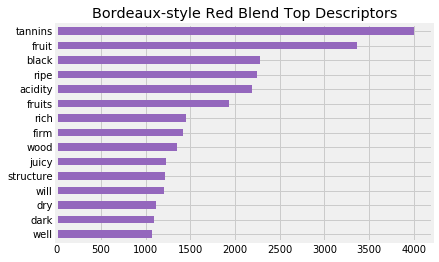

In [47]:
Bordeaux_style_Red_Blend = wine_variety(reviews, 'Bordeaux-style Red Blend')
Bordeaux_style_Red_Blend

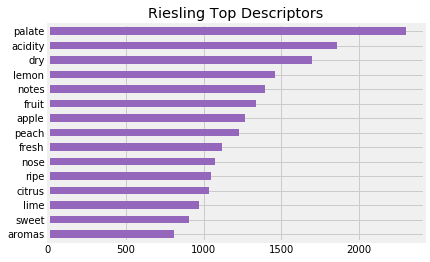

In [48]:
Riesling = wine_variety(reviews, 'Riesling')
Riesling

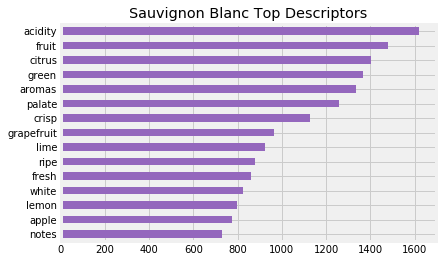

In [49]:
Sauvignon_Blanc = wine_variety(reviews, 'Sauvignon Blanc')
Sauvignon_Blanc

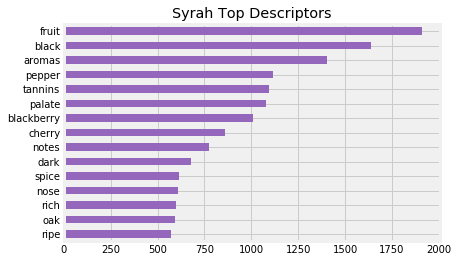

In [50]:
Syrah = wine_variety(reviews, 'Syrah')
Syrah

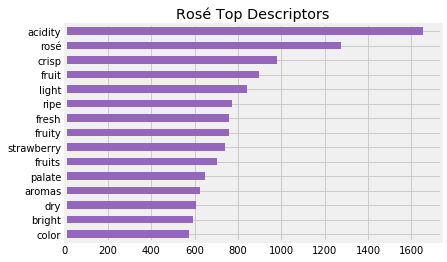

In [51]:
Rosé = wine_variety(reviews, 'Rosé')
Rosé

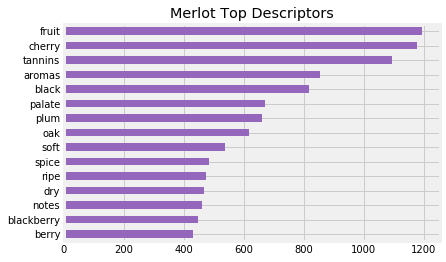

In [52]:
Merlot = wine_variety(reviews, 'Merlot')
Merlot